In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline 

In [2]:
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")   #1.1
df.head()                                                           #1.2
print(df.columns)                                                   #1.3
print(df.shape)                                                     #1.4
null_values = df.isna().sum(axis = 0)                               #1.5
print(null_values)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

<AxesSubplot:title={'center':'Null values in coloumn'}>

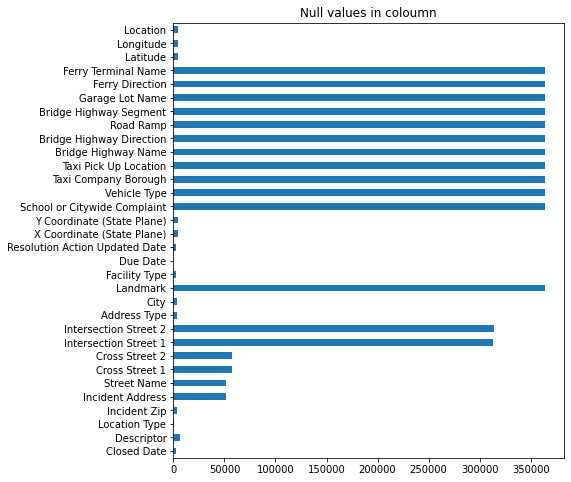

In [3]:
null_values[null_values.values > 1].plot(kind = 'barh' , figsize = (7,8) , title = 'Null values in coloumn')   #2.1

In [4]:
#filter = df["Closed Date"].isna() == True                    #2.2
df.dropna(subset = ["Closed Date"],inplace = True)            #drop Closed dates where value is NAN
df["Created Date"].isna().any()
df["Closed Date"] = pd.to_datetime(df["Closed Date"])
df["Created Date"] = pd.to_datetime(df["Created Date"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      362177 non-null  int64         
 1   Created Date                    362177 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          362177 non-null  object        
 4   Agency Name                     362177 non-null  object        
 5   Complaint Type                  362177 non-null  object        
 6   Descriptor                      355681 non-null  object        
 7   Location Type                   362047 non-null  object        
 8   Incident Zip                    361502 non-null  float64       
 9   Incident Address                310491 non-null  object        
 10  Street Name                     310491 non-null  object 

In [5]:
df[["Closed Date","Created Date"]].isna().any()
df[df["Created Date"] >= df["Closed Date"]].shape                                    # no dates where complaint resolved before even created
df["Resolve Date"] = (df["Closed Date"] - df["Created Date"]).astype('timedelta64[s]')   #2.3.1 & 2.3.2- new coloumn describes time taken for each complaint to get solved
print(df["Resolve Date"].describe)                                                       #2.3.3
print(df[["City","Complaint Type"]].isna().sum())                                        #2.3.4 - checking number of null values in these two coloumns
df["City"].fillna("UNKNOWN CITY",inplace = True)                                         #2.3.5 

<bound method NDFrame.describe of 0          3330.0
1          5233.0
2         17494.0
3         27927.0
4         12464.0
           ...   
364553    37067.0
364554     8434.0
364555     1143.0
364556     9653.0
364557    10020.0
Name: Resolve Date, Length: 362177, dtype: float64>
City              674
Complaint Type      0
dtype: int64


<AxesSubplot:title={'center':'Complaints Distribution over each City'}, ylabel='City'>

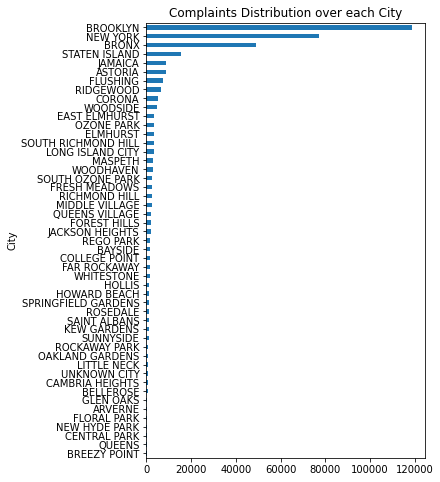

In [6]:
city_group = df.groupby(df['City'].str.upper())   #tried to upper() whole City coloumn but failed so added this logic in groupby
city_group.size().sort_values().plot(kind = 'barh', figsize = (5,8), title = 'Complaints Distribution over each City')          #2.3.6

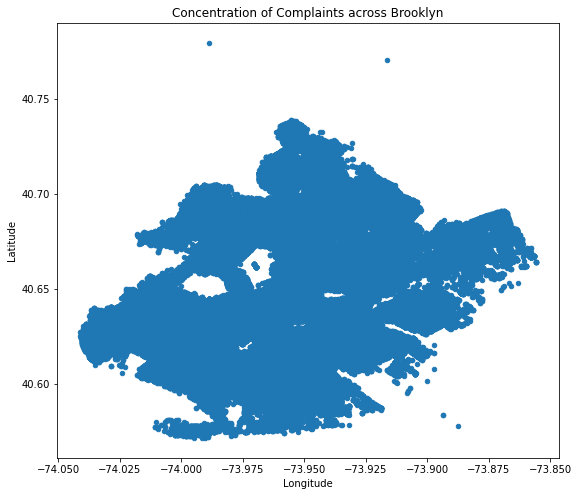

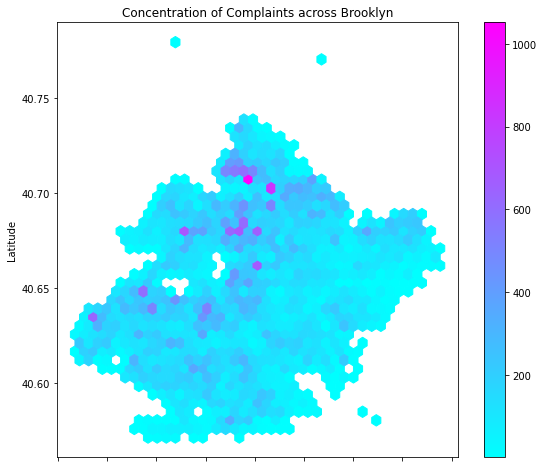

In [7]:
df_brooklyn = city_group.get_group("BROOKLYN")                                #2.3.7
df_brooklyn[['Longitude', 'Latitude']].plot(kind = 'scatter', x='Longitude', y='Latitude', title = 'Concentration of Complaints across Brooklyn', figsize = (9, 8));
df_brooklyn[['Longitude', 'Latitude']].plot(kind = 'hexbin', x='Longitude', y='Latitude', colormap = 'cool',mincnt=1,gridsize=40, title = 'Concentration of Complaints across Brooklyn', figsize = (9, 8));

<AxesSubplot:title={'center':'Complain Type Frequnecy of entire Dataset'}>

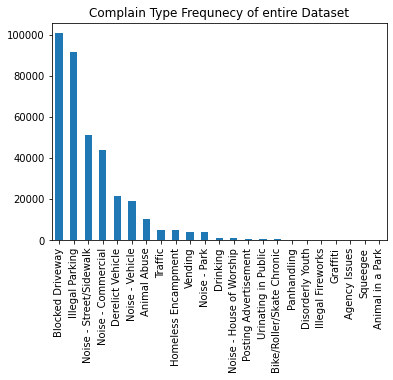

In [8]:
"""
complaint_group = df.groupby("Complaint Type")                    
complaint_freq_dict = {x:complaint_group.get_group(x).shape[0] for x in df["Complaint Type"].unique()}
sorted_values = sorted(complaint_freq_dict.items(), key = lambda x:x[1] , reverse = True)
values = [x[1] for x in sorted_values]
labels = [x[0] for x in sorted_values]
"""
df['Complaint Type'].value_counts().plot(kind = 'bar', title = 'Complain Type Frequnecy of entire Dataset')    #3.1

<AxesSubplot:title={'center':'Complaint Type Frequency of New York'}>

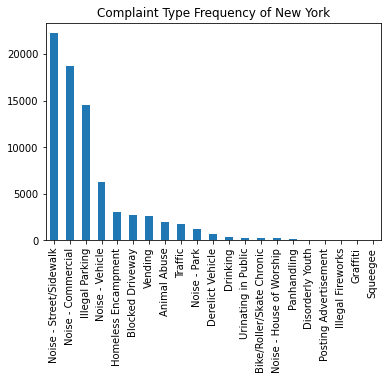

In [9]:
city_group.get_group("NEW YORK")["Complaint Type"].value_counts().plot(kind = 'bar', title = 'Complaint Type Frequency of New York') #3.2

In [10]:
df["Complaint Type"].value_counts().head(10)                   #3.3

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

In [11]:
df.groupby([df['City'].str.upper(),'Complaint Type']).size()    #3.4

City      Complaint Type         
ARVERNE   Animal Abuse                46
          Blocked Driveway            50
          Derelict Vehicle            32
          Disorderly Youth             2
          Drinking                     1
                                    ... 
WOODSIDE  Noise - Street/Sidewalk    266
          Noise - Vehicle            136
          Traffic                     45
          Urinating in Public          8
          Vending                     15
Length: 774, dtype: int64

In [12]:
df_new = pd.pivot_table(df,index = ['Complaint Type'], columns = df['City'].str.upper(), aggfunc=['count'] )        #3.5
#df_new.fillna('No Data',inplace = True)
print(df_new.head())
#df_new.columns


                                 count                                         \
                          Address Type                                          
City                           ARVERNE ASTORIA BAYSIDE BELLEROSE BREEZY POINT   
Complaint Type                                                                  
Agency Issues                      NaN     NaN     NaN       NaN          NaN   
Animal Abuse                      46.0   170.0    53.0      15.0          2.0   
Animal in a Park                   NaN     NaN     NaN       NaN          NaN   
Bike/Roller/Skate Chronic          NaN    16.0     NaN       1.0          NaN   
Blocked Driveway                  50.0  3595.0   514.0     138.0          3.0   

                                                                          \
                                                                           
City                         BRONX BROOKLYN CAMBRIA HEIGHTS CENTRAL PARK   
Complaint Type                            

<AxesSubplot:xlabel='City'>

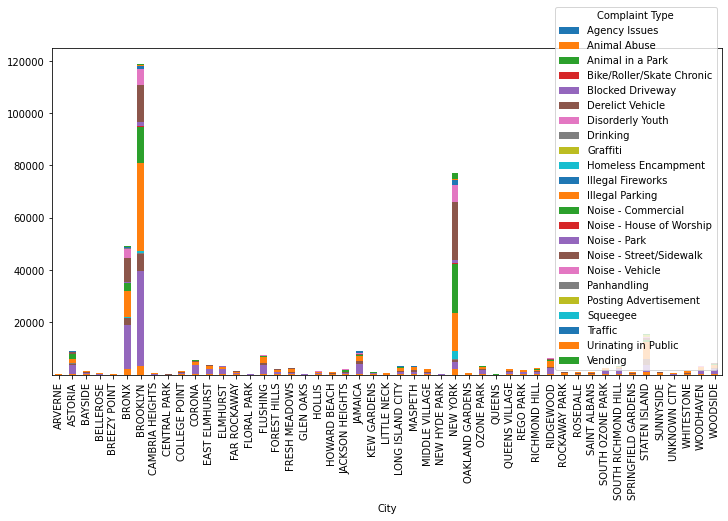

In [70]:
df.groupby([df["City"].str.upper(),'Complaint Type']).size().unstack().plot(kind='bar',stacked = True, figsize = (12,6))
#plot(kind='bar',stacked = True, figsize = (12,10))          #4.1

In [14]:
#gb = df.groupby(['Complaint Type','City'])["Resolve Date"].size()
#df.sort_values(['Resolve Date']).groupby(['Complaint Type','City'])["Resolve Date"].mean()
#.groupby(['Complaint Type',df['City'].str.upper()])["Resolve Date"].mean()
df.groupby([df["City"].str.upper(),'Complaint Type'])["Resolve Date"].mean().unstack()    #4.2

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,NaN,8399.195652,NaN,NaN,8318.840000,11394.000000,12928.500000,859.000000,5508.000000,6541.250000,...,6653.428571,4638.000000,7173.206897,5673.600000,3673.000000,NaN,NaN,4014.000000,2491.000000,1735.000000
ASTORIA,NaN,17206.882353,NaN,6718.750000,16514.914047,32210.693182,9713.800000,15518.279070,50742.250000,17704.312500,...,6931.047619,11063.968750,12405.880866,12734.932203,16282.500000,22951.666667,NaN,17423.683333,15886.600000,18273.438596
BAYSIDE,NaN,11203.547170,NaN,NaN,9345.945525,12261.627706,9338.500000,6848.000000,16381.333333,10342.500000,...,16136.666667,11783.750000,5334.941176,5621.833333,NaN,NaN,NaN,5500.888889,NaN,6760.500000
BELLEROSE,NaN,31969.200000,NaN,17616.000000,30114.326087,55246.883333,6631.500000,14105.000000,NaN,140930.000000,...,7909.000000,5091.000000,32648.230769,13528.090909,26966.000000,8136.000000,NaN,20170.888889,27149.000000,NaN
BREEZY POINT,NaN,9408.500000,NaN,NaN,4775.333333,25733.000000,NaN,9495.000000,NaN,NaN,...,NaN,NaN,3612.000000,4742.000000,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,NaN,25230.563673,NaN,13576.636364,21103.643770,31531.592423,15103.757576,20399.587379,27618.266667,25811.436364,...,16168.588889,16933.045620,18735.084864,19748.060742,50782.100000,11889.722222,NaN,17052.571429,19633.685185,23882.066975
BROOKLYN,NaN,16698.195863,NaN,16918.798387,15202.162327,20445.852166,14538.341772,13016.518900,24721.266667,16943.745781,...,11131.370180,11324.975873,11762.792090,11554.233026,15540.816327,11858.086207,NaN,10931.849762,13566.135484,16007.506087
CAMBRIA HEIGHTS,NaN,35043.000000,NaN,NaN,27272.214689,50322.952703,NaN,NaN,NaN,70109.833333,...,9493.000000,NaN,16341.137931,22763.420000,NaN,NaN,NaN,26696.714286,NaN,NaN
CENTRAL PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12457.076190,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Complaint Type', ylabel='Average Time'>

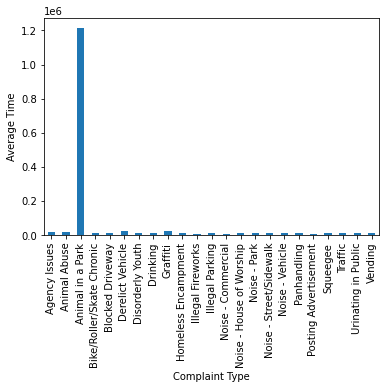

In [37]:
df.groupby("Complaint Type")["Resolve Date"].mean().plot(kind = 'bar', ylabel ="Average Time")   #5.1

<AxesSubplot:title={'center':'Average Resolution Time in each city'}, xlabel='City', ylabel='Average Time'>

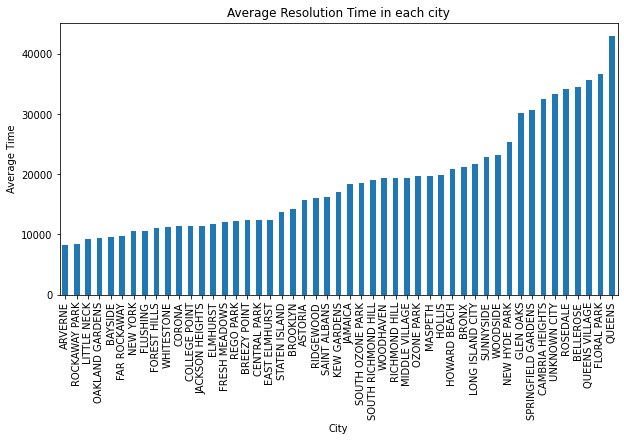

In [36]:
df.groupby(df["City"].str.upper())["Resolve Date"].mean().sort_values().plot(kind = 'bar',title = 'Average Resolution Time in each city',figsize=(10,5), ylabel="Average Time")

##### 

In [58]:
df1 = df.groupby([df["City"].str.upper(),'Status']).size().unstack().fillna(0)
df1['Unresolved_percentage']= df1['Open']/df1['Open'].sum()*100
df1["Unresolved_percentage"].sort_values(ascending = False)

City
JAMAICA                22.222222
BROOKLYN               19.444444
NEW YORK               19.444444
STATEN ISLAND           8.333333
BRONX                   8.333333
FRESH MEADOWS           5.555556
WOODHAVEN               2.777778
LONG ISLAND CITY        2.777778
ELMHURST                2.777778
WOODSIDE                2.777778
CORONA                  2.777778
SPRINGFIELD GARDENS     2.777778
HOLLIS                  0.000000
ASTORIA                 0.000000
BAYSIDE                 0.000000
GLEN OAKS               0.000000
BELLEROSE               0.000000
FOREST HILLS            0.000000
CAMBRIA HEIGHTS         0.000000
CENTRAL PARK            0.000000
FLORAL PARK             0.000000
FAR ROCKAWAY            0.000000
BREEZY POINT            0.000000
EAST ELMHURST           0.000000
HOWARD BEACH            0.000000
COLLEGE POINT           0.000000
FLUSHING                0.000000
LITTLE NECK             0.000000
JACKSON HEIGHTS         0.000000
RIDGEWOOD               0.000000
WHITE

<AxesSubplot:ylabel='Unresolved_percentage'>

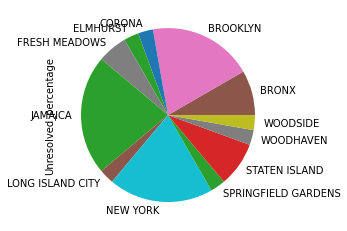

In [67]:
df1["Unresolved_percentage"].plot(kind = 'pie')